In [197]:
# Dependencies and Setup
import hvplot.pandas as hvplot
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
from scipy import stats
import json

# Import API key
from alan_api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



In [2]:
#Read CSV Files
high_df = pd.read_csv('../data/high_inc_data.csv')
low_df = pd.read_csv('../data/low_inc_data.csv')

#Create into data frames
df_high = pd.DataFrame(high_df)
df_low = pd.DataFrame(low_df)


In [3]:
df_high.head()


,NAME,High_med_inc,state,place,City_x,State,City_y,Latitude,Longitude,Store Count
0,"Hoover city, Alabama",103194,1,35896,Hoover city,Alabama,"Hoover city, Alabama",33.387197,-86.805680,1.0
1,"Anchorage municipality, Alaska",100751,2,3000,Anchorage municipality,Alaska,"Anchorage municipality, Alaska",61.216313,-149.894852,1.0
2,"Buckeye city, Arizona",95235,4,7940,Buckeye city,Arizona,"Buckeye city, Arizona",33.370320,-112.583776,0.0
3,"Casas Adobes CDP, Arizona",75650,4,10670,Casas Adobes CDP,Arizona,"Casas Adobes CDP, Arizona",32.340932,-111.010201,0.0
4,"Chandler city, Arizona",98664,4,12000,Chandler city,Arizona,"Chandler city, Arizona",33.306203,-111.841185,12.0


In [4]:
df_low.head()

,NAME,Low_med_inc,state,place,City_x,State,City_y,Latitude,Longitude,Store Count
0,"Auburn city, Alabama",54839,1,3076,Auburn city,Alabama,"Auburn city, Alabama",32.601014,-85.516657,0.0
1,"Birmingham city, Alabama",39326,1,7000,Birmingham city,Alabama,"Birmingham city, Alabama",33.599853,-86.632216,1.0
2,"Dothan city, Alabama",53929,1,21184,Dothan city,Alabama,"Dothan city, Alabama",31.221808,-85.378001,0.0
3,"Huntsville city, Alabama",68930,1,37000,Huntsville city,Alabama,"Huntsville city, Alabama",34.729847,-86.585901,0.0
4,"Mobile city, Alabama",50051,1,50000,Mobile city,Alabama,"Mobile city, Alabama",30.689362,-88.051896,0.0


In [19]:
#Clean DataFrames

#pulling cols into var
high_col_to_pull = ['City_x', 'State', 'Latitude', 'Longitude', 'High_med_inc']
low_col_to_pull = ['City_x', 'State', 'Latitude', 'Longitude', 'Low_med_inc']

#Selected df
high_sel_df = df_high[high_col_to_pull]
low_sel_df = df_low[low_col_to_pull]

high_sel_df.columns = ['Cities', 'States', 'Lat', 'Lon', 'High Income']
low_sel_df.columns = ['Cities', 'States', 'Lat', 'Lon', 'Low Income']

#removed the word'city' from the City/Town Column
high_sel_df.loc[:, 'Cities'] = high_sel_df['Cities'].str.replace(' city', '', case=False)
low_sel_df.loc[:, 'Cities'] = low_sel_df['Cities'].str.replace(' city', '', case=False)


#removed the word'town' from the City/Town Column
high_sel_df.loc[:, 'Cities'] = high_sel_df['Cities'].str.replace(' town', '', case=False)
low_sel_df.loc[:, 'Cities'] = low_sel_df['Cities'].str.replace(' town', '', case=False)

#removed the word'town' from the City/Town Column
high_sel_df.loc[:, 'Cities'] = high_sel_df['Cities'].str.replace(' CDP', '', case=False)
low_sel_df.loc[:, 'Cities'] = low_sel_df['Cities'].str.replace(' CDP', '', case=False)

#Cleaned DataFrames
high_city_df = high_sel_df
low_city_df = low_sel_df

high_city_df['Cities'].drop_duplicates
low_city_df['Cities'].drop_duplicates

#clean city cols

<bound method Series.drop_duplicates of 0                    Auburn
1                Birmingham
2                    Dothan
3                Huntsville
4                    Mobile
               ...         
315      Caguas zona urbana
316    Carolina zona urbana
317    Guaynabo zona urbana
318       Ponce zona urbana
319    San Juan zona urbana
Name: Cities, Length: 320, dtype: object>

In [20]:
high_city_df.head()

,Cities,States,Lat,Lon,High Income
0,Hoover,Alabama,33.387197,-86.805680,103194
1,Anchorage municipality,Alaska,61.216313,-149.894852,100751
2,Buckeye,Arizona,33.370320,-112.583776,95235
3,Casas Adobes,Arizona,32.340932,-111.010201,75650
4,Chandler,Arizona,33.306203,-111.841185,98664


In [8]:
low_city_df.head()

,Cities,States,Lat,Lon,Low Income
0,Auburn,Alabama,32.601014,-85.516657,54839
1,Birmingham,Alabama,33.599853,-86.632216,39326
2,Dothan,Alabama,31.221808,-85.378001,53929
3,Huntsville,Alabama,34.729847,-86.585901,68930
4,Mobile,Alabama,30.689362,-88.051896,50051


In [21]:
low_city_df.groupby('States')['Cities'].count()

States
Alabama            7
Arizona            5
Arkansas           6
California        28
Colorado           3
Connecticut        5
Delaware           1
Florida           37
Georgia            7
Idaho              3
Illinois           9
Indiana            9
Iowa               7
Kansas             4
Kentucky           3
Louisiana          7
Maine              1
Maryland           2
Massachusetts      7
Michigan          10
Minnesota          4
Mississippi        2
Missouri           6
Montana            1
Nebraska           2
Nevada             5
New Jersey         9
New Mexico         3
New York           8
North Carolina    10
North Dakota       2
Ohio               9
Oklahoma           4
Oregon             4
Pennsylvania       7
Puerto Rico        6
Rhode Island       2
South Carolina     4
South Dakota       2
Tennessee          8
Texas             37
Utah               3
Virginia           7
Washington         5
Wisconsin          8
Wyoming            1
Name: Cities, dtype: int64

In [10]:
high_city_df.groupby('States')['Cities'].count()

States
Alabama                   1
Alaska                    1
Arizona                  14
Arkansas                  1
California              114
Colorado                 16
Connecticut               3
District of Columbia      1
Florida                  20
Georgia                   6
Hawaii                    1
Idaho                     2
Illinois                 10
Indiana                   3
Iowa                      2
Kansas                    3
Maryland                 10
Massachusetts            10
Michigan                  7
Minnesota                 9
Missouri                  3
Montana                   1
Nevada                    4
New Hampshire             2
New Jersey                4
New Mexico                1
New York                  2
North Carolina            5
Oklahoma                  2
Oregon                    4
Rhode Island              2
South Carolina            2
Tennessee                 1
Texas                    27
Utah                      8
Virginia     

In [67]:
combined_clean_df = pd.merge(high_city_df, low_city_df, how='inner', on=['Cities'])
# combined_clean_df = combined_clean_df.sort_values(by='Cities', ascending=True)
combined_clean_df

,Cities,States_x,Lat_x,Lon_x,High Income,States_y,Lat_y,Lon_y,Low Income
0,Peoria,Arizona,33.580612,-112.237294,86948,Illinois,40.692568,-89.593010,55955
1,Glendale,California,34.153801,-118.255039,77483,Arizona,33.538686,-112.185994,72411
2,Lakewood,California,33.846539,-118.112278,109309,New Jersey,40.093316,-74.211049,59460
3,Lakewood,Colorado,39.708857,-105.083046,85988,New Jersey,40.093316,-74.211049,59460
4,Pasadena,California,34.163831,-118.156746,95134,Texas,29.691673,-95.196198,57078
5,Richmond,California,6.056255,80.221460,88594,Virginia,37.542341,-77.439876,58988
6,San Marcos,California,34.825117,-114.598742,103595,Texas,35.469264,-97.515679,52040
7,Union,California,34.529078,-117.298461,148460,New Jersey,40.777646,-74.023058,58020
8,Columbia,Maryland,39.199038,-76.841517,120675,Missouri,41.156928,-85.488462,58067
9,Columbia,Maryland,39.199038,-76.841517,120675,South Carolina,41.156928,-85.488462,56175


In [64]:
high_city_df.head(1)

,Cities,States,Lat,Lon,High Income
0,Hoover,Alabama,33.387197,-86.80568,103194


In [103]:
#Sample view of api 

radius = 10000 
categories = "commercial.food_and_drink"
lat= 34.2228071
lon = -119.0516609

params = {"apiKey": geoapify_key,
            "categories": categories,
            "limit": 20,
            "filter": f"circle:{lon},{lat},{radius}",
            "bias": f"proximity:{lon},{lat}"}

url = "https://api.geoapify.com/v2/places"
data = requests.get(url, params=params).json()
print(json.dumps(data, indent=4, sort_keys=True))

{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    -119.04075021748328,
                    34.22312457149496
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Best Buy Market Wine & Lotto",
                "address_line2": "Pickwick Drive, Camarillo, CA 93010, United States of America",
                "categories": [
                    "building",
                    "building.commercial",
                    "commercial",
                    "commercial.food_and_drink",
                    "commercial.food_and_drink.drinks"
                ],
                "city": "Camarillo",
                "country": "United States",
                "country_code": "us",
                "county": "Ventura County",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Databas

In [136]:
radius = 10000
categories = "commercial.food_and_drink.health_food"

# Initialize an empty list to store the dictionaries
result_data = []

print("Starting commercial.food_and_drink.health_food search...")

# Iterate through both high_city_df and low_city_df
for df,income_column, category_label in [
    
    (high_city_df, 'High Income', 'High'),
    (low_city_df, 'Low Income', 'Low')
]:
    for index, row in df.iterrows():
        lat, lon = row['Lat'], row['Lon']

        params = {
            "apiKey": geoapify_key,
            "categories": categories,
            "filter": f"circle:{lon},{lat},{radius}",
            "bias": f"proximity:{lon},{lat}"
        }

        url = "https://api.geoapify.com/v2/places"

        try:
            # Make the API request
            response = requests.get(url, params=params)
            response.raise_for_status()  # Raise an HTTPError for bad responses

            # Process the response data
            data = response.json()

            # Check if 'features' key is present and count the number of features
            if 'features' in data:
                count = len(data['features'])
                if count > 0:
                    # Iterate through the features and add relevant information to the result_data list
                    for feature in data['features']:
                        result_data.append({
                            'City': row['Cities'],
                            'State': row['States'],
                            'Lat': lat,
                            'Lon': lon,
                            'Location_Name' : feature['properties']['address_line1'],
                            'Category_Label': category_label,
                            'Income': row[income_column]
                        })

        except requests.exceptions.RequestException as e:
            # Handle exceptions here, e.g., print an error message
            print(f"Error during API request for {row['Cities']}: {e}")

# Convert the list of dictionaries to a DataFrame
result_df = pd.DataFrame(result_data)

# Print the resulting DataFrame
print(result_df)


Starting commercial.food_and_drink.health_food search...
                     City        State        Lat         Lon  \
0                 Phoenix      Arizona  33.448437 -112.074141   
1              Scottsdale      Arizona  33.494219 -111.926018   
2              Scottsdale      Arizona  33.494219 -111.926018   
3                   Tempe      Arizona  33.425512 -111.940016   
4                 Alameda   California  37.766461 -122.243496   
..                    ...          ...        ...         ...   
395    Caguas zona urbana  Puerto Rico  18.338810  -67.251630   
396  Carolina zona urbana  Puerto Rico  18.407670  -65.981020   
397  Guaynabo zona urbana  Puerto Rico  18.380340  -67.188390   
398     Ponce zona urbana  Puerto Rico  18.338810  -67.251630   
399  San Juan zona urbana  Puerto Rico  18.338810  -67.251630   

           Location_Name Category_Label  Income  
0          Healthy Habit           High   75969  
1       Lady+Wolf Market           High  100636  
2           

In [137]:
response = requests.get(url, params=params)
response

<Response [200]>

In [138]:
commerical_health_food_df = result_df
commerical_health_food_df

,City,State,Lat,Lon,Location_Name,Category_Label,Income
0,Phoenix,Arizona,33.448437,-112.074141,Healthy Habit,High,75969
1,Scottsdale,Arizona,33.494219,-111.926018,Lady+Wolf Market,High,100636
2,Scottsdale,Arizona,33.494219,-111.926018,nohoshot,High,100636
3,Tempe,Arizona,33.425512,-111.940016,Lady+Wolf Market,High,76007
4,Alameda,California,37.766461,-122.243496,Family First,High,131116
...,...,...,...,...,...,...,...
395,Caguas zona urbana,Puerto Rico,18.338810,-67.251630,Edward's Go Natural,Low,22060
396,Carolina zona urbana,Puerto Rico,18.407670,-65.981020,Il Nuovo Mercato,Low,36646
397,Guaynabo zona urbana,Puerto Rico,18.380340,-67.188390,Edward's Go Natural,Low,48081
398,Ponce zona urbana,Puerto Rico,18.338810,-67.251630,Edward's Go Natural,Low,16795


In [139]:
selected_columns = ['City', 'State', 'Lat', 'Lon', 'Category_Label', 'Location_Name', 'Income']

# Select the desired columns and drop duplicates
no_dups_health_food_df = commerical_health_food_df[selected_columns].drop_duplicates()

In [140]:
#Healthy food places within the radius of high and low cities. This will be used to plot the data updated
no_dups_health_food_df

,City,State,Lat,Lon,Category_Label,Location_Name,Income
0,Phoenix,Arizona,33.448437,-112.074141,High,Healthy Habit,75969
1,Scottsdale,Arizona,33.494219,-111.926018,High,Lady+Wolf Market,100636
2,Scottsdale,Arizona,33.494219,-111.926018,High,nohoshot,100636
3,Tempe,Arizona,33.425512,-111.940016,High,Lady+Wolf Market,76007
4,Alameda,California,37.766461,-122.243496,High,Family First,131116
...,...,...,...,...,...,...,...
395,Caguas zona urbana,Puerto Rico,18.338810,-67.251630,Low,Edward's Go Natural,22060
396,Carolina zona urbana,Puerto Rico,18.407670,-65.981020,Low,Il Nuovo Mercato,36646
397,Guaynabo zona urbana,Puerto Rico,18.380340,-67.188390,Low,Edward's Go Natural,48081
398,Ponce zona urbana,Puerto Rico,18.338810,-67.251630,Low,Edward's Go Natural,16795


In [143]:
# no_dups_health_food_df.to_csv('../data/commerical_health_food_data.csv', index=False)

In [144]:
no_dups_health_food_df.head(1)

,City,State,Lat,Lon,Category_Label,Location_Name,Income
0,Phoenix,Arizona,33.448437,-112.074141,High,Healthy Habit,75969


In [166]:
high_mean = no_dups_health_food_df.loc[no_dups_health_food_df['Category_Label'] == 'High', 'Income'].mean().__round__(2)
low_mean = no_dups_health_food_df.loc[no_dups_health_food_df['Category_Label'] == 'Low', 'Income'].mean().__round__(2)
high_max_income = no_dups_health_food_df.loc[no_dups_health_food_df['Category_Label'] == 'High', ['State', 'City', 'Income', 'Location_Name']].max()
low_max_income = no_dups_health_food_df.loc[no_dups_health_food_df['Category_Label'] == 'Low', ['State', 'City', 'Income', 'Location_Name']].min()


print(f'High Income Average: {high_mean}')
print(f'Low Income Average: {low_mean}')
print(f'Income High: {high_max_income}')
print(f'Income Low: {low_max_income}')

High Income Average: 103228.58
Low Income Average: 57435.15
Income High: State                   Wisconsin
City                  Westminster
Income                     186892
Location_Name    néktər Juice Bar
dtype: object
Income Low: State                     Alabama
City                        Akron
Income                      16795
Location_Name    2B Fit Nutrition
dtype: object


In [201]:
map_plot_all = no_dups_health_food_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriStreet",
    frame_width = 800,
    frame_height = 600,
    color = "City",
    hover = True,
    dynamic =True,
    hover_cols="all"
)
#Save hvPlot in html to open in local browser
# hvplot.save(map_plot_1, '../output_data/City_HvPlot_Fig2.html')
# Display the map
map_plot_all

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,index,State,Category_Label,Location_Name,Income)

In [202]:
map_plot_high = no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'High'].hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriStreet",
    frame_width = 800,
    frame_height = 600,
    color = "City",
    hover = True,
    dynamic =True,
    hover_cols="all"
)
#Save hvPlot in html to open in local browser
# hvplot.save(map_plot_1, '../output_data/City_HvPlot_Fig2.html')
# Display the map
map_plot_high

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,index,State,Category_Label,Location_Name,Income)

In [206]:
map_plot_low = no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'Low'].hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriStreet",
    frame_width = 800,
    frame_height = 600,
    color = "City",
    hover = True,
    dynamic =True,
    hover_cols="all"
)
#Save hvPlot in html to open in local browser
# hvplot.save(map_plot_1, '../output_data/City_HvPlot_Fig2.html')
# Display the map
map_plot_low

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,index,State,Category_Label,Location_Name,Income)

In [205]:
map_plot_nj = no_dups_health_food_df[no_dups_health_food_df['State'] == 'New Jersey'].hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriStreet",
    frame_width = 800,
    frame_height = 600,
    color = "City",
    hover = True,
    dynamic =True,
    hover_cols="all"
)
#Save hvPlot in html to open in local browser
# hvplot.save(map_plot_1, '../output_data/City_HvPlot_Fig2.html')
# Display the map
map_plot_nj

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,index,State,Category_Label,Location_Name,Income)

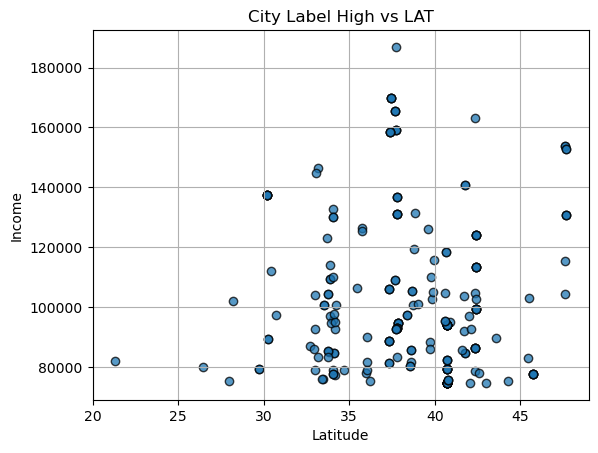

In [194]:
# Build scatter plot for latitude vs. income
plt.scatter(no_dups_health_food_df["Lat"][no_dups_health_food_df['Category_Label'] == 'High'], no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'High']['Income'], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Label High vs LAT")
plt.xlabel("Latitude")
plt.ylabel("Income")
plt.grid(True)

# Save the figure
# plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


In [191]:
print(len(no_dups_health_food_df["Lat"]))
print(len(no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'High']['Income']))


398
226


In [195]:
#Function to create Linear Plots
# Create Plot
def liner_regression_plts(x_values, y_values, y_label, annotation_coords=(10, -30),title=""):
    # Calculate linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
        
    # Create scatter plot
    plt.scatter(x_values, y_values, label='Data points')

    #Line Equasion
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)  
        
    # Create regression line plot
    plt.plot(x_values, regress_values, color='red', label='Linear Regression')
    plt.title(title)    
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(line_eq, annotation_coords, fontsize=15, color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show the plot
    plt.show()

y = -21.21x +104042.94
The r-value is: 1.293952313506774e-05


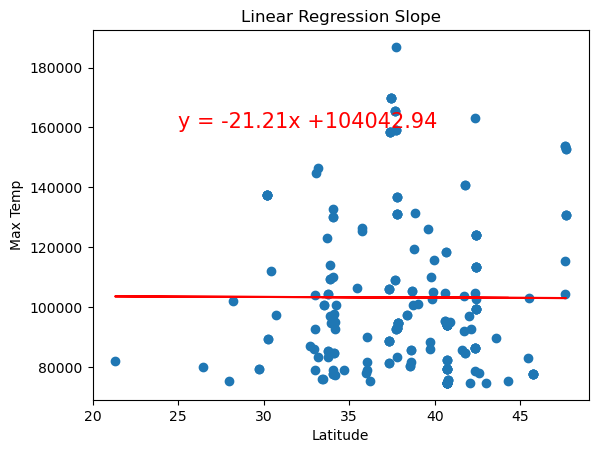

In [200]:
liner_regression_plts(no_dups_health_food_df["Lat"][no_dups_health_food_df['Category_Label'] == 'High'], no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'High']['Income'], "Max Temp", (25, 160000),"Linear Regression Slope")

y = 661.11x +32695.49
The r-value is: 0.15163254039321966


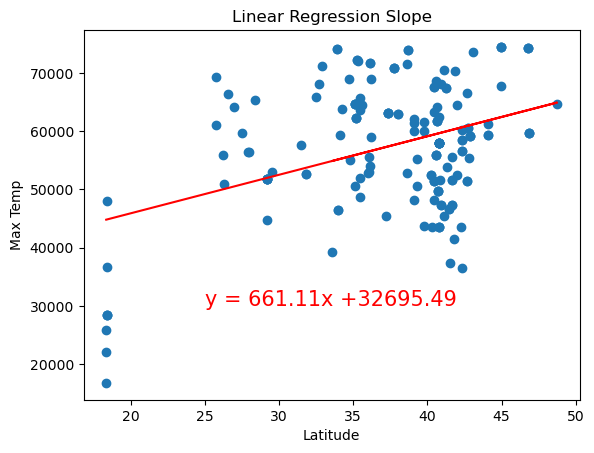

In [209]:
liner_regression_plts(no_dups_health_food_df["Lat"][no_dups_health_food_df['Category_Label'] == 'Low'], no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'Low']['Income'], "Max Temp", (25, 30000),"Linear Regression Slope")